### Regresión Lineal 10
## Métricas Regresión Lineal

In [13]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. 

Los objetivo de este pairprogramming son:

Calculéis las métricas para vuestro modelo

Discutid los resultados de las métricas y extraed conclusiones

Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [3]:
df = pd.read_csv('../datos/df_regresion.csv', index_col = 0)
df.head()

,City,Product_line,Unit_price,Quantity,Tax_5,Total,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,0.718160,0.509930,0.919607,0.919607,1.157015,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,-1.525303,-0.174540,-0.987730,-0.987730,1.364384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,-0.352781,0.509930,0.071446,0.071446,0.355296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,0.096214,0.852165,0.675780,0.675780,0.846698,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,1.156959,0.509930,1.267125,1.267125,-0.938704,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


In [4]:
X = df.drop('RATING_LOG', axis = 1)
y = df['RATING_LOG']

In [5]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [7]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [8]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para las casas que tenemos en los datos de test

In [9]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
29,0.355296,0.016935,Train
535,0.355296,0.285131,Train
695,-0.088260,0.013952,Train
557,-1.573077,-0.102416,Train
836,-0.725244,0.090083,Train


In [10]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
29,0.355296,0.016935,Train,0.338362
535,0.355296,0.285131,Train,0.070165
695,-0.088260,0.013952,Train,-0.102211
557,-1.573077,-0.102416,Train,-1.470661
836,-0.725244,0.090083,Train,-0.815327


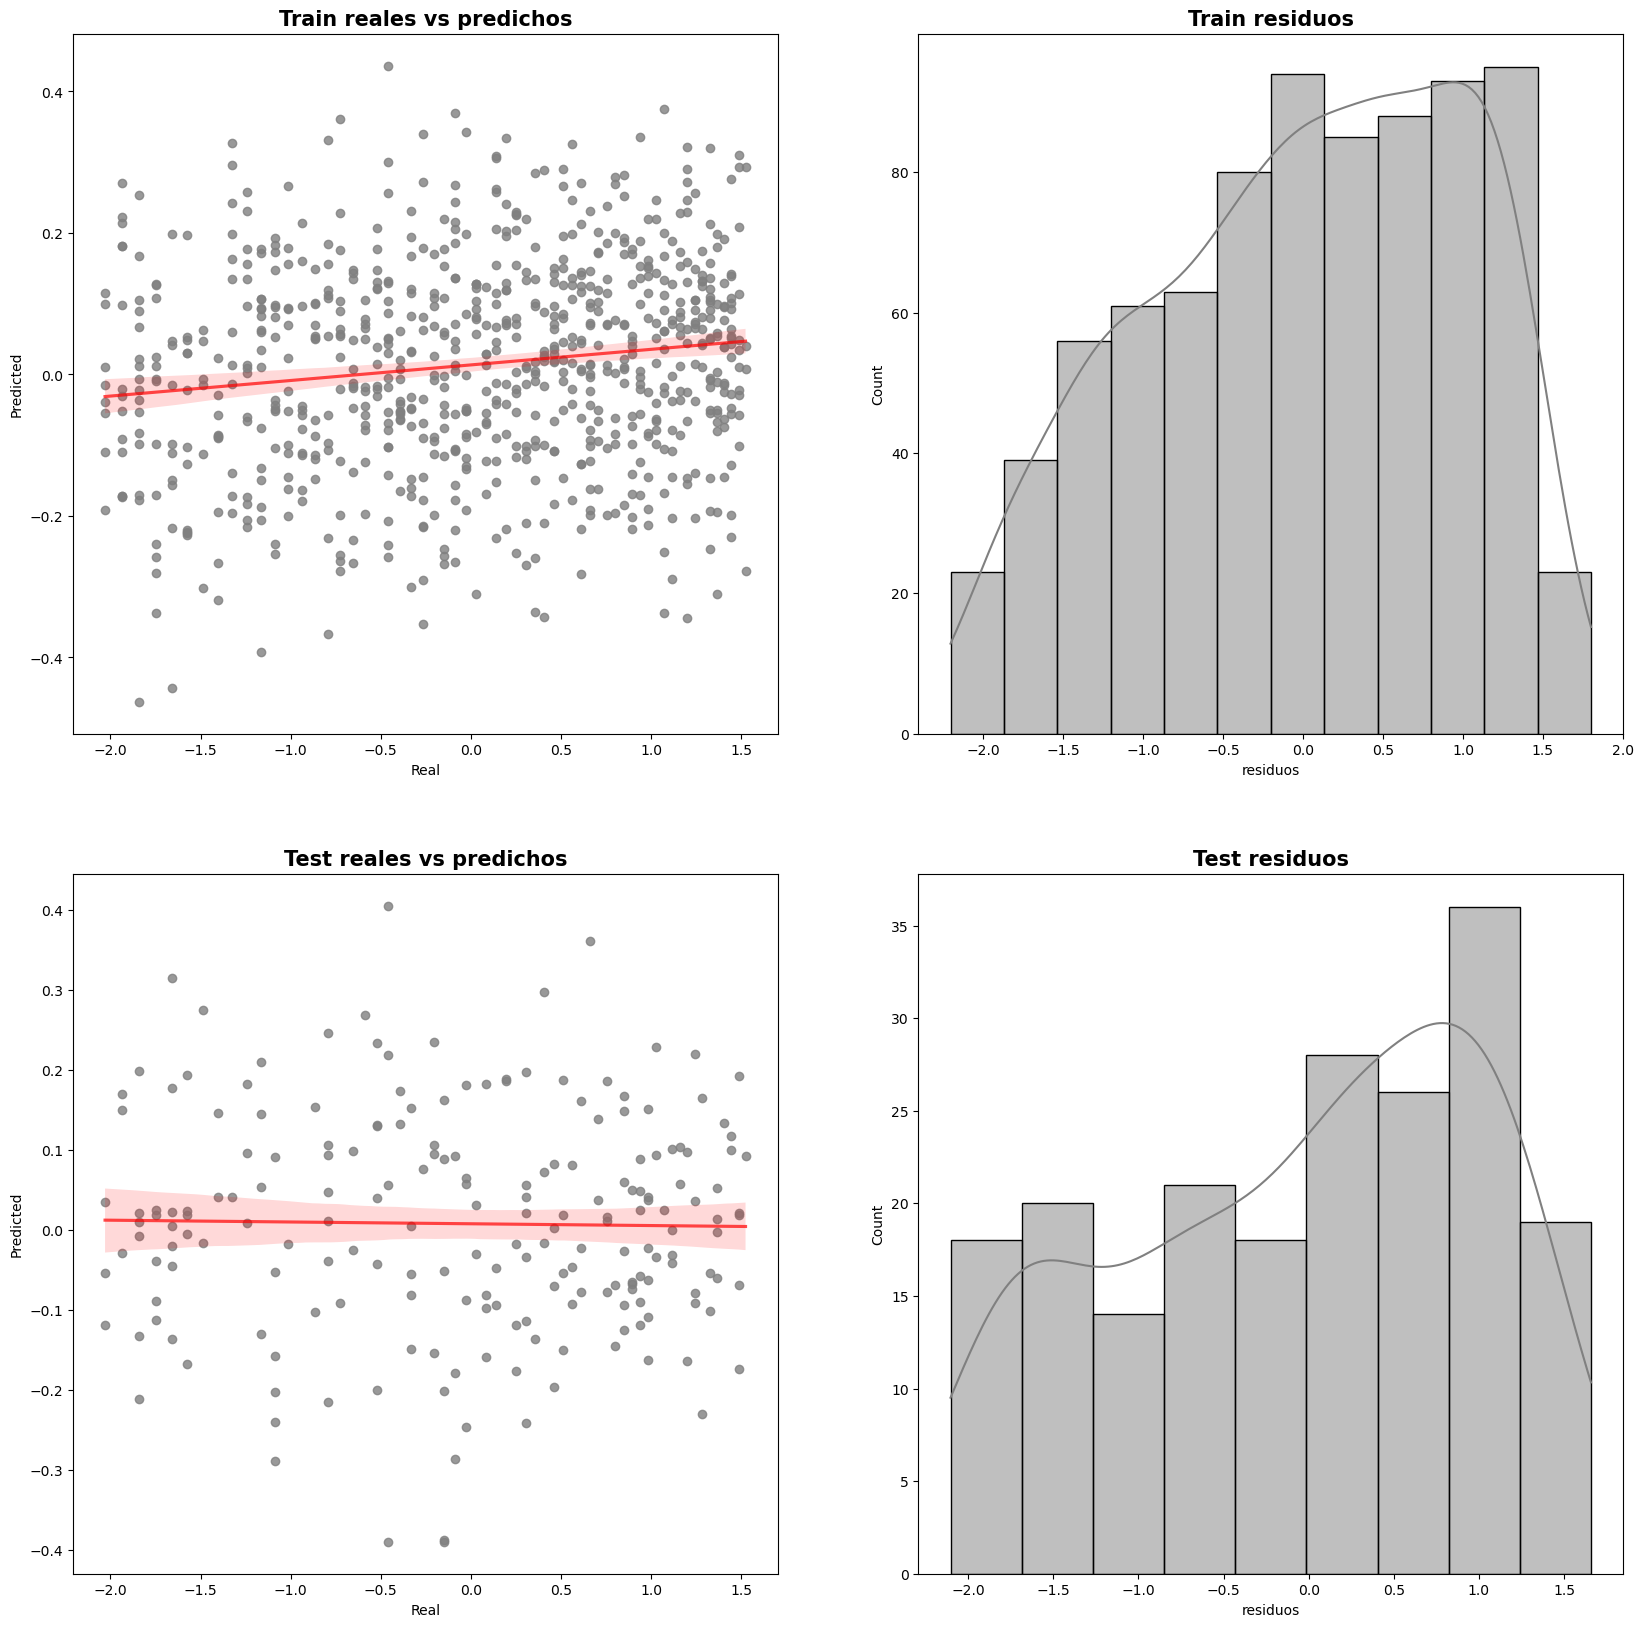

In [11]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


In [14]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.022030977051789802
El MAE es 0.829472780493375
El MSE es 0.9590563669694463
EL RMSE es  0.979314233006672
Para el conjunto test:---------------
El valor de r2 score es  -0.02606083678133997
El MAE es 0.8973679626678924
El MSE es 1.1015347315847472
EL RMSE es  1.0495402477202802


In [15]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.897368,1.101535,1.049540,-0.026061,test,Linear Regresion
1,0.829473,0.959056,0.979314,0.022031,train,LinearRegression


In [21]:
df.head(5)

,City,Product_line,Unit_price,Quantity,Tax_5,Total,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,0.718160,0.509930,0.919607,0.919607,1.157015,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,-1.525303,-0.174540,-0.987730,-0.987730,1.364384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,-0.352781,0.509930,0.071446,0.071446,0.355296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,0.096214,0.852165,0.675780,0.675780,0.846698,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,1.156959,0.509930,1.267125,1.267125,-0.938704,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
City,1000.0,1.668000e+00,0.471167,1.000000,1.000000,2.000000,2.000000,2.000000
Product_line,1000.0,2.256600e+00,1.241482,1.000000,1.000000,1.800000,3.500000,4.300000
Unit_price,1000.0,-1.136868e-16,1.000500,-1.721668,-0.860874,-0.016696,0.840699,1.672416
Quantity,1000.0,6.394885e-17,1.000500,-1.543480,-0.859010,-0.174540,0.852165,1.536635
Tax_5,1000.0,1.154632e-16,1.000500,-1.270692,-0.807871,-0.281242,0.603768,2.928371
Total,1000.0,4.085621e-17,1.000500,-1.270692,-0.807871,-0.281242,0.603768,2.928371
RATING_LOG,1000.0,6.181722e-16,1.000500,-2.029708,-0.795100,0.139858,0.892579,1.522647
Gender_Female,1000.0,5.010000e-01,0.500249,0.000000,0.000000,1.000000,1.000000,1.000000
Gender_Male,1000.0,4.990000e-01,0.500249,0.000000,0.000000,0.000000,1.000000,1.000000
Payment_Cash,1000.0,3.440000e-01,0.475279,0.000000,0.000000,0.000000,1.000000,1.000000


In [40]:
df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.894338,1.102665,1.050079,-0.027114,test,Linear Regresion
1,0.832396,0.964371,0.982024,0.016612,train,LinearRegression


In [41]:
df_resultados.to_csv('../datos/resultados_regresion.csv')

Interpretación de los resultados:

    - R2: 0.022031 en el conjunto de train, este número es muy bajo, por lo tanto, nuestras variables independientes o predictoras no explican nada de la variación de nuestra variable respuesta. El modelo no sirve.

    -RMSE: 0.979314 en el conjunto de train, refuerza el resultado de que el modelo no es bueno, ya que es muy alto; significa que tenemos mucha distancia promedio entre los valores reales y los predichos.
    
    - considerando el valor mínimo (-2.029708) y máximo (1.522647) de la variable respuesta normalizada y viendo que el RMSE es de 0.979314; quiere decir, que nuestro valor predicho tendrá una variación de casi 1 respecto al real, en un rango de datos mínimo y máximo muy pequeño.

In [23]:
df.head()

,City,Product_line,Unit_price,Quantity,Tax_5,Total,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,0.718160,0.509930,0.919607,0.919607,1.157015,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,-1.525303,-0.174540,-0.987730,-0.987730,1.364384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,-0.352781,0.509930,0.071446,0.071446,0.355296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,0.096214,0.852165,0.675780,0.675780,0.846698,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,1.156959,0.509930,1.267125,1.267125,-0.938704,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


VAMOS A PROBAR QUITANDO LAS COLUMNAS QUE EN ORIGEN ERAN NUMÉRICAS

In [27]:
df2 = df.drop(['Unit_price','Quantity','Tax_5','Total'], axis = 1)

In [28]:
df2.head()

,City,Product_line,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,1.157015,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,1.364384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,0.355296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,0.846698,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,-0.938704,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


In [29]:
X = df2.drop('RATING_LOG', axis = 1)
y = df2['RATING_LOG']

In [31]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [33]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [34]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para las casas que tenemos en los datos de test

In [35]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
29,0.355296,-0.072339,Train
535,0.355296,0.217447,Train
695,-0.088260,0.025272,Train
557,-1.573077,0.128800,Train
836,-0.725244,0.079336,Train


In [36]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
29,0.355296,-0.072339,Train,0.427635
535,0.355296,0.217447,Train,0.137850
695,-0.088260,0.025272,Train,-0.113531
557,-1.573077,0.128800,Train,-1.701877
836,-0.725244,0.079336,Train,-0.804580


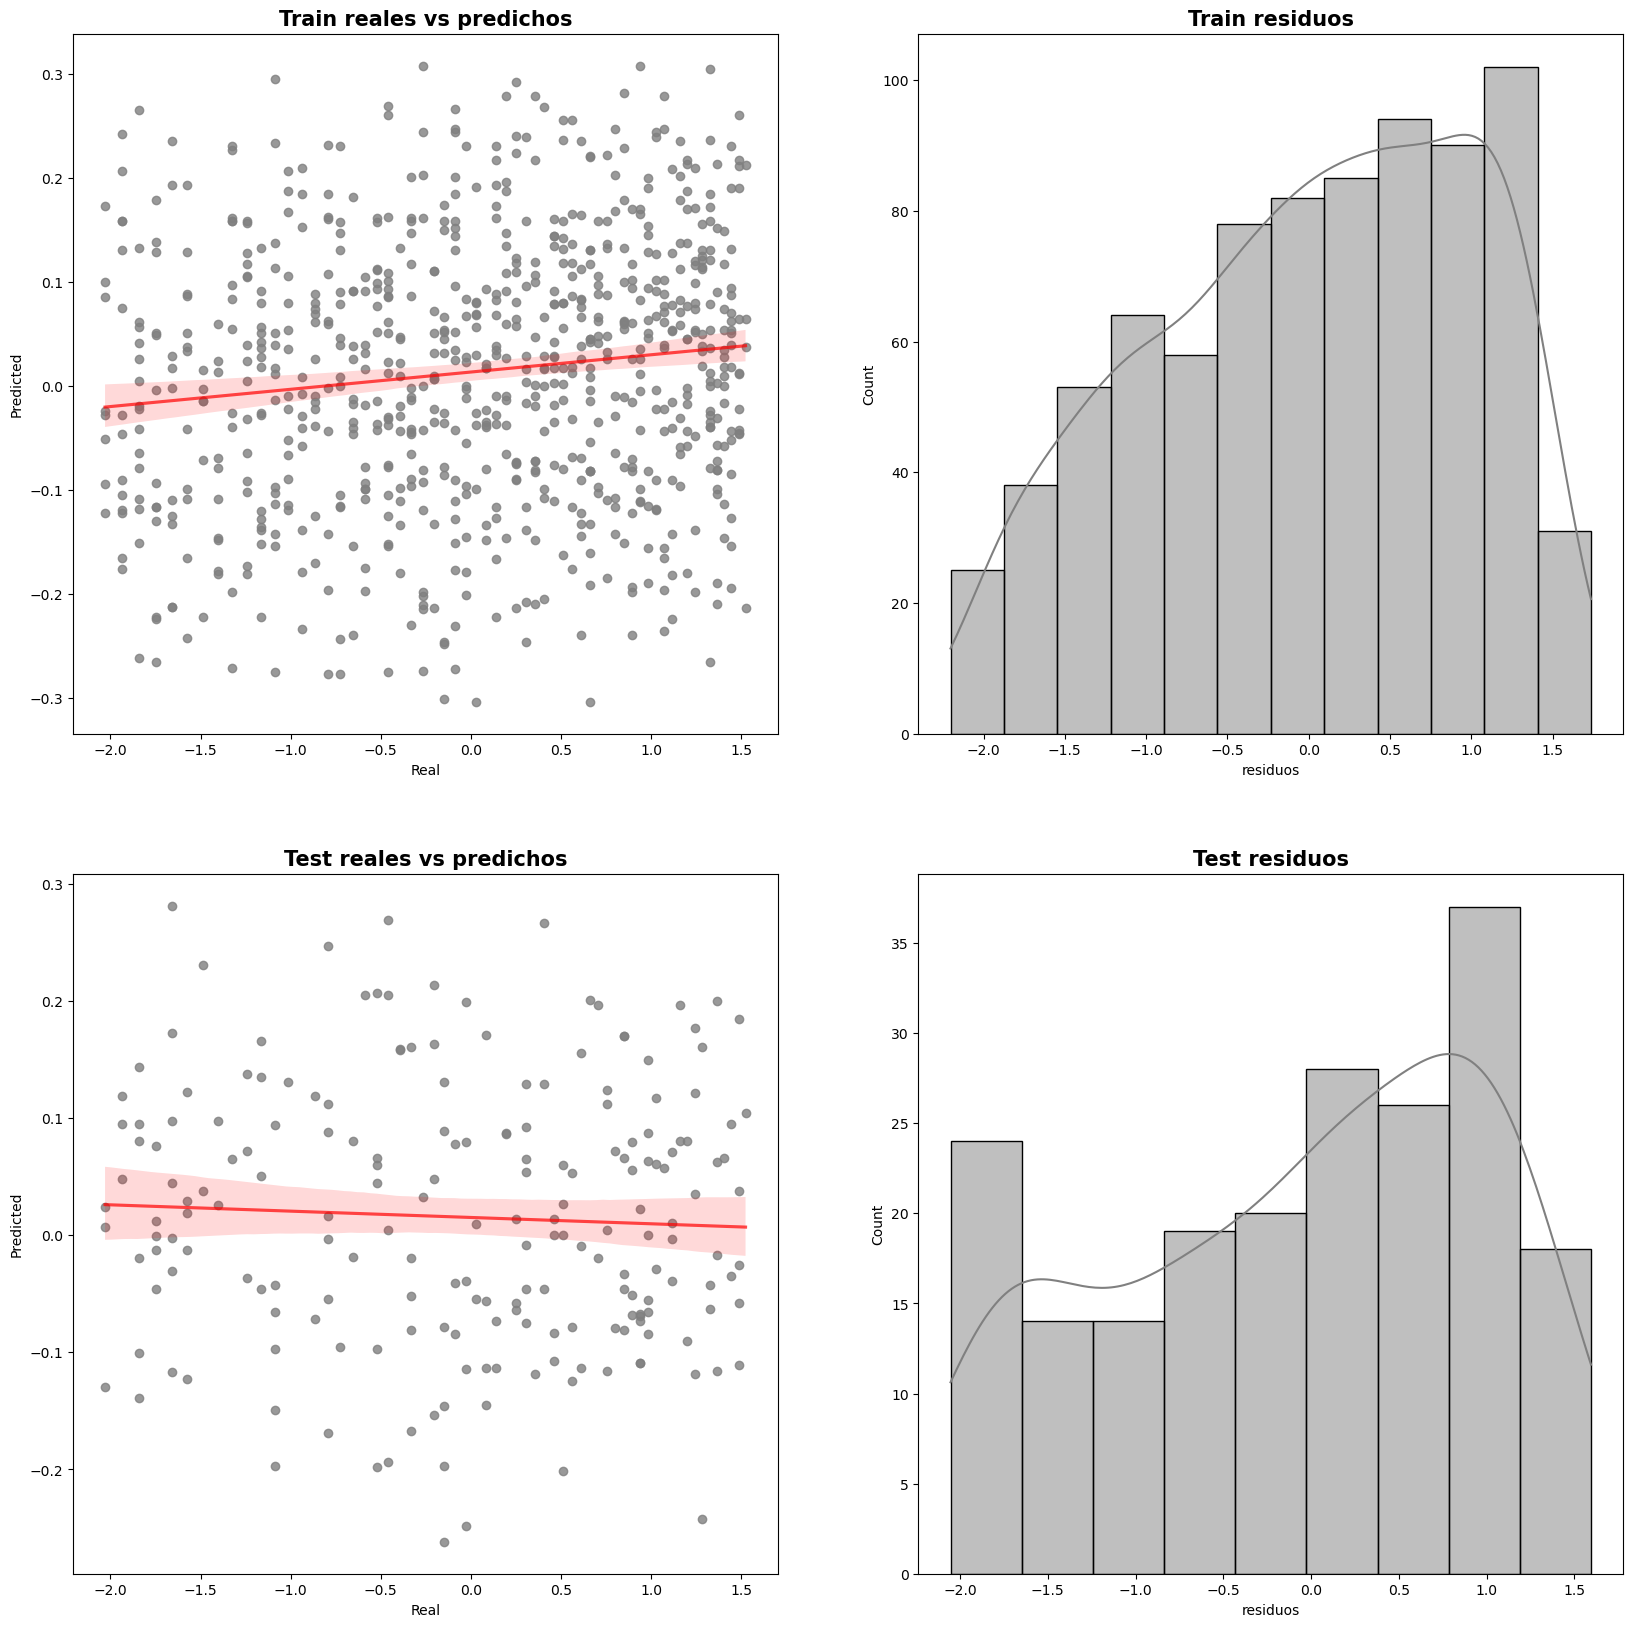

In [37]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


In [38]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.01661185346886518
El MAE es 0.8323958871262651
El MSE es 0.9643706917114819
EL RMSE es  0.9820237734960808
Para el conjunto test:---------------
El valor de r2 score es  -0.027113649412262353
El MAE es 0.8943376958334942
El MSE es 1.102664985890574
EL RMSE es  1.0500785617707724


In [39]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.894338,1.102665,1.050079,-0.027114,test,Linear Regresion
1,0.832396,0.964371,0.982024,0.016612,train,LinearRegression
